In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
import requests

In [11]:
client_id = "oXRz7HWebFp6YdQ0YT3PMQ"
api_key = "Mm2MVQluEx7HWKjAMxJQT_KOSB_nKvEeQmjn19VS9PnsOBDoqtegFU1RoBXG0Lum415Eus2bKYuo-eb6mgMm1xV5nhwh3H5uhg-HJN39VFSMjIkwyRCbpLVv7ws7XXYx"

### ----- Helpers--------

In [12]:
# # write a function to make a call to the API

def yelp_call(url_params, api_key):

    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()['businesses']
    return data

In [20]:
def all_results(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    results = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        results.append(yelp_call(url_params, api_key))
        time.sleep(1) #Wait a second
        cur += 50
    return results

In [21]:
term = 'Restaurants'
location = 'Brooklyn'
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50
             }

In [15]:
#Testing the function
yelp_call(url_params,api_key)

[{'id': '2-z6dRAkKupCyz1LF251pQ',
  'alias': 'jintana-thai-farmhouse-brooklyn',
  'name': 'Jintana Thai Farmhouse',
  'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/adSu7Wk66v4TsbQ9KNmOHQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/jintana-thai-farmhouse-brooklyn?adjust_creative=oXRz7HWebFp6YdQ0YT3PMQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oXRz7HWebFp6YdQ0YT3PMQ',
  'review_count': 59,
  'categories': [{'alias': 'thai', 'title': 'Thai'}],
  'rating': 4.5,
  'coordinates': {'latitude': 40.666597, 'longitude': -73.98211},
  'transactions': ['restaurant_reservation'],
  'location': {'address1': '344 7th Ave',
   'address2': '',
   'address3': None,
   'city': 'Brooklyn',
   'zip_code': '11215',
   'country': 'US',
   'state': 'NY',
   'display_address': ['344 7th Ave', 'Brooklyn, NY 11215']},
  'phone': '+17187881922',
  'display_phone': '(718) 788-1922',
  'distance': 3939.448150743429},
 {'id': 'E8gpCgCVaO2hNEPTrh4n2A',
  'alias

In [22]:
all_restaurants = all_results(url_params, api_key)
print(len(all_restaurants))

15200 total matches found.
20


In [23]:
all_restaurants[0][0]

{'id': '2-z6dRAkKupCyz1LF251pQ',
 'alias': 'jintana-thai-farmhouse-brooklyn',
 'name': 'Jintana Thai Farmhouse',
 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/adSu7Wk66v4TsbQ9KNmOHQ/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/jintana-thai-farmhouse-brooklyn?adjust_creative=oXRz7HWebFp6YdQ0YT3PMQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oXRz7HWebFp6YdQ0YT3PMQ',
 'review_count': 59,
 'categories': [{'alias': 'thai', 'title': 'Thai'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.666597, 'longitude': -73.98211},
 'transactions': ['restaurant_reservation'],
 'location': {'address1': '344 7th Ave',
  'address2': '',
  'address3': None,
  'city': 'Brooklyn',
  'zip_code': '11215',
  'country': 'US',
  'state': 'NY',
  'display_address': ['344 7th Ave', 'Brooklyn, NY 11215']},
 'phone': '+17187881922',
 'display_phone': '(718) 788-1922',
 'distance': 3939.448150743429}

In [24]:
#function to parse the data and keep only the ones to be uploaded in AWS DB
def parse_api(data):
    parsed_data = []
    final_parsed_restaurants = []
    for i in range(len(data)):
        for j in range(50):
            parsed_data.append(data[i][j])
    
    #create a list with SQL tables columnns names
    for parsed_restaurant in parsed_data:
        if 'price' in parsed_restaurant.keys():
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': parsed_restaurant['price'],'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
        else:
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': "",'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
    return final_parsed_restaurants

In [25]:
#call the function and return a list with only the columns names in SQL
parsed_restaurants_v2 = parse_api(all_restaurants)

In [26]:
len(parsed_restaurants_v2)

1000

In [27]:
parsed_restaurants_v2

[{'restaurant_id': '2-z6dRAkKupCyz1LF251pQ',
  'restaurant_name': 'Jintana Thai Farmhouse',
  'price': '',
  'rating': 4.5,
  'review_count': 59},
 {'restaurant_id': 'E8gpCgCVaO2hNEPTrh4n2A',
  'restaurant_name': 'The Ryerson',
  'price': '',
  'rating': 5.0,
  'review_count': 27},
 {'restaurant_id': '_iPthQyOqcwanZcVZ28M2Q',
  'restaurant_name': 'Franklin820',
  'price': '$$',
  'rating': 4.0,
  'review_count': 64},
 {'restaurant_id': 'GA5msU6NO9rQRctPfDJCBg',
  'restaurant_name': 'Peaches HotHouse',
  'price': '$$',
  'rating': 4.0,
  'review_count': 1117},
 {'restaurant_id': 'GxMhN2PEttvw7CRGIzB6Gg',
  'restaurant_name': "Baron's",
  'price': '$$',
  'rating': 4.5,
  'review_count': 267},
 {'restaurant_id': 'VDz9n7gwcq51wOAbTBdXxA',
  'restaurant_name': 'The Food Sermon Kitchen',
  'price': '$$',
  'rating': 4.5,
  'review_count': 251},
 {'restaurant_id': 'YwpP-mgXV5N35xhLibLw5g',
  'restaurant_name': "Mo's Original",
  'price': '$$',
  'rating': 4.5,
  'review_count': 52},
 {'resta

In [28]:
df = pd.DataFrame.from_dict(parsed_restaurants_v2)

In [29]:
df.head()

,restaurant_id,restaurant_name,price,rating,review_count
0,2-z6dRAkKupCyz1LF251pQ,Jintana Thai Farmhouse,,4.5,59
1,E8gpCgCVaO2hNEPTrh4n2A,The Ryerson,,5.0,27
2,_iPthQyOqcwanZcVZ28M2Q,Franklin820,$$,4.0,64
3,GA5msU6NO9rQRctPfDJCBg,Peaches HotHouse,$$,4.0,1117
4,GxMhN2PEttvw7CRGIzB6Gg,Baron's,$$,4.5,267


In [30]:
len(df)

1000

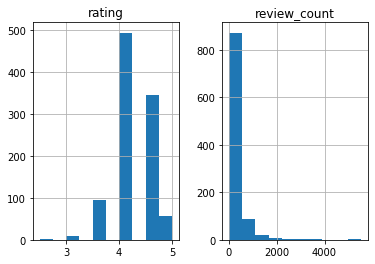

In [31]:
df.hist()
plt.show()

In [32]:
df.head()

,restaurant_id,restaurant_name,price,rating,review_count
0,2-z6dRAkKupCyz1LF251pQ,Jintana Thai Farmhouse,,4.5,59
1,E8gpCgCVaO2hNEPTrh4n2A,The Ryerson,,5.0,27
2,_iPthQyOqcwanZcVZ28M2Q,Franklin820,$$,4.0,64
3,GA5msU6NO9rQRctPfDJCBg,Peaches HotHouse,$$,4.0,1117
4,GxMhN2PEttvw7CRGIzB6Gg,Baron's,$$,4.5,267


In [33]:
df.price.value_counts(normalize=True)

$$      0.665
$       0.148
        0.120
$$$     0.058
$$$$    0.008
££      0.001
Name: price, dtype: float64

In [34]:
df.to_excel("Restaurant_2.xlsx")

In [ ]:
df = pd.read_excel("Restaurant_1.xlsx",index_col=0)

In [ ]:
df.head()

In [35]:
restaurant_id_list_2 = list(df.restaurant_id)

In [36]:
restaurant_id_list_2

['2-z6dRAkKupCyz1LF251pQ',
 'E8gpCgCVaO2hNEPTrh4n2A',
 '_iPthQyOqcwanZcVZ28M2Q',
 'GA5msU6NO9rQRctPfDJCBg',
 'GxMhN2PEttvw7CRGIzB6Gg',
 'VDz9n7gwcq51wOAbTBdXxA',
 'YwpP-mgXV5N35xhLibLw5g',
 'tXWA5kUJnZY_NbED1-ST0g',
 '49ST--X1jcIPzUIM1O3K6w',
 'el63-4CunMQQBIYpLayFTg',
 'nOjGNqPcu5jHRRElOndQqQ',
 'eN8Cmf0Vxucyg02NyP7mbw',
 'CwOAKJdX8AMz5iAoA-ZEuA',
 'RfxOtJ4SQmEeVX_XjFLWUQ',
 'swKXaURwqdSrSTcpHsxdbA',
 '1x2hn3e9sCCZca1cnRTpEg',
 'KkAtVVjnMfb1vGlcpzmhgw',
 'hdiTkEnD14VpXNl-APTg2g',
 'unePwYAUWb7oC8RBt84e3A',
 'mxDfu4bHwSXoCr3FRpyMsw',
 'OzgvdC0oJPh1FQTLJF2yXw',
 'NDIrifAl6K-RrnZ2D3ZGbw',
 'XNkC1vJmLOI8NRR3Jl_vyQ',
 '34LM8_lP8iwizHBu6YgaQQ',
 'TRVWU2c4SzbsgWOo6Dz2Aw',
 'SSDOkx5enfRH3nsniS_2jA',
 'BprO0tybje6_T6HdT6icyQ',
 'DOdamkEm9JWR9s6VH_NuOQ',
 'Ms3CAGddVbgetiQrpzqxPQ',
 'eOxGkxi5hEY426ww5qk3GA',
 'wnyX_yg4ddSDkupwFKftIA',
 '4CiYqpxZK2f5-GSkte1ekA',
 'L7_siqDfU4-ZA17YtA-SBg',
 'x_YWFkTcxEu1lo8Nlrog5A',
 'q2bIyvU8CQwiB6xe_iVs0g',
 'oOsJn3leUnWDfErRWMf81g',
 '1Bv7VqxnnfJs8o9NUzGB1g',
 

### scrape reviews for one restaurant

In [37]:
# creating the link to access the reviews
url_prefix = 'https://www.yelp.com/biz/'
url_suffix = '?rh_type=phrase'
test_id = 'ETgJqJHV7BW6pIr9Ox74sA'
full_url = url_prefix+test_id+url_suffix

In [38]:
#testing the concatenation
full_url

'https://www.yelp.com/biz/ETgJqJHV7BW6pIr9Ox74sA?rh_type=phrase'

In [39]:
#parse html file
source = requests.get(full_url).text

In [ ]:
source

In [ ]:
soup = BeautifulSoup(source,'html')

In [ ]:
print(soup.prettify())

In [ ]:
reviews_section = soup.find(class_='lemon--span__373c0__3997G',lang='en')


In [ ]:
reviews_section

In [ ]:
reviews_section.text

In [ ]:
rating_section = soup.find(class_='lemon--div__373c0__1mboc i-stars__373c0__30xVZ i-stars--regular-5__373c0__3En2C border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I')

In [ ]:
rating_section['aria-label']

In [ ]:
all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
all_reviews_section

In [ ]:
reviews=[]
for i in range(len(all_reviews_section)):
    reviews.append({i:all_reviews_section[i].text})

In [ ]:
reviews

In [ ]:
len(reviews)

In [ ]:
pd.DataFrame(reviews).transpose()

In [40]:
# using a function to scrape reviews with restaurant ID in a list
def scrape_list(list_id):
    reviews=[]
    for resto_id in list_id:
        url_prefix = 'https://www.yelp.com/biz/'
        url_suffix = '?rh_type=phrase'
        test_id = resto_id
        full_url = url_prefix+test_id+url_suffix
        
        source = requests.get(full_url).text
        soup = BeautifulSoup(source,'html')
        all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
        
        for i in range(len(all_reviews_section)):
            reviews.append({test_id:all_reviews_section[i].text})
            
    return reviews           

In [ ]:
full_reviews = scrape_list(restaurant_id_list_2)

In [ ]:
len(full_reviews)

In [ ]:
full_reviews

In [ ]:
tuple_reviews=[(restid, review) for i in range(len(full_reviews)) for restid, review in full_reviews[i].items()]

In [ ]:
tuple_reviews

In [ ]:
data = pd.DataFrame(tuple_reviews,columns=['Restaurant_Id','Review'])

In [ ]:
data['count'] = [x for x in range(len(data))]

In [ ]:
data['col_rev_'] = data['count']%20+1

In [ ]:
data=data.drop(columns='count')

In [ ]:
data.head(25)

In [ ]:
data.Restaurant_Id.nunique()

In [ ]:
pivot_table = data.pivot_table(index=['Restaurant_Id'],
                               columns=['col_rev_'],
                             values=['Review'],
                             aggfunc=lambda x: ' '.join(str(v) for v in x))

In [ ]:
pivot_table.head(25)

In [ ]:
len(pivot_table)

In [ ]:
pivot_table=pivot_table.reset_index()

In [ ]:
pivot_table.columns = pivot_table.columns.droplevel()

In [ ]:
pivot_table.head(25)

In [ ]:
columns_name = ['review_'+str(i+1) for i in range(20)]

In [ ]:
columns_name.insert(0,'Restaurant_Id')

In [ ]:
columns_name

In [ ]:
pivot_table.columns = columns_name

In [ ]:
pivot_table.columns

In [ ]:
pivot_table.to_excel('yelp_reviews_2.xlsx')